In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy.random as rnd
import scipy.stats as ss

# Descriptive statistics
### 1. Overview of measured density, modulus of elasticity, knot ratio, grain angle deviation and strength per considered timber species
### 2. Correlations between independent variables, and between dependent and independent variables
### 3. Determination of distribution functions per variable for later use in Monte Carlo simulation

In [2]:
# Read in data
data = pd.read_csv('Data_MOBETa.csv',sep=';')
species = ['Massaranduba','Okan','Billinga','Eveuss','Tali','Greenheart']

rnd.seed(10)

for i in species: 
    nmetKR = len(data.KR[ (data.KR>0) & (data.Species==i) ])         # Number of data with a knot ratio > 0
    a = data.KR[(data.KR==0)&(data.Species==i)]                      # Data with KR = 0
    remove_n = len(a) - nmetKR
    drop_indices = rnd.choice(data.index[(data.KR==0)&(data.Species==i)], remove_n, replace=False)
    data = data.drop(drop_indices)

### 1. Overview of measured density, modulus of elasticity, knot ratio, grain angle deviation and strength per considered timber species

In [3]:
## Number of pieces with grain angle deviation
for i in species:
    print (i,len(data.alpha[(data.alpha!=0.) & (data.Species==i)])/float(len(data[data.Species==i])))
print ('# of clear wood test pieces:', len(data.alpha[(data.alpha==0.)&(data.KR==0)]))
print (len(data))

Massaranduba 0.9404761904761905
Okan 0.8913043478260869
Billinga 0.8461538461538461
Eveuss 0.9583333333333334
Tali 0.7916666666666666
Greenheart 0.9
# of clear wood test pieces: 15
288


In [4]:
## Number of test data with KR = 0
for i in species:
    print (i,len(data.KR[(data.KR==0.) & (data.Species==i)]))
## Total number with KR > 0
print (len(data.KR[(data.KR!=0.)&(data.KR!=0)]))

Massaranduba 42
Okan 23
Billinga 13
Eveuss 24
Tali 12
Greenheart 30
144


In [5]:
## Per species average strength and coefficient of variation
print("Species, strength, CoV")
for i in species:
    print (i,format(data.fm12[data.Species==i].mean(),'.1f'),format(data.fm12[data.Species==i].std()/data.fm12[data.Species==i].mean(),'.2f'))

Species, strength, CoV
Massaranduba 120.2 0.24
Okan 68.4 0.32
Billinga 44.3 0.28
Eveuss 116.0 0.24
Tali 73.2 0.21
Greenheart 95.0 0.28


In [6]:
## Per species average modulus of elasticity and coefficient of variation
print("Species, average MoE, CoV")
for i in species:
    print (i,format(data.Edyn12[data.Species==i].mean(),'.1f'),format(data.Edyn12[data.Species==i].std()/data.Edyn12[data.Species==i].mean(),'.2f'))

Species, average MoE, CoV
Massaranduba 26650.0 0.13
Okan 18665.9 0.19
Billinga 13862.2 0.17
Eveuss 26253.5 0.10
Tali 18724.6 0.10
Greenheart 26404.4 0.11


In [7]:
## Per species average density and coefficient of variation
print("Species, average density, CoV")
for i in species:
    print (i,format(data.rho12[data.Species==i].mean(),'.1f'),format(data.rho12[data.Species==i].std()/data.rho12[data.Species==i].mean(),'.2f'))

Species, average density, CoV
Massaranduba 1045.9 0.05
Okan 950.8 0.15
Billinga 742.6 0.08
Eveuss 1013.9 0.05
Tali 898.2 0.06
Greenheart 997.0 0.05


### 2. Correlations between independent variables, and between dependent and independent variables

Massaranduba r= 0.19 and p= 0.01
Okan r= 0.17 and p= 0.12
Billinga r= -0.05 and p= 0.72
Eveuss r= -0.17 and p= 0.11
Tali r= -0.02 and p= 0.87
Greenheart r= 0.15 and p= 0.13
r= 0.02 and p= 0.72
-0.00012104461598112233 0.18851493482316872 -0.1108391532425352 0.06029712005748007 6.417782812246537e-05


Text(0.5,1,'corr rho en KR Massaranduba')

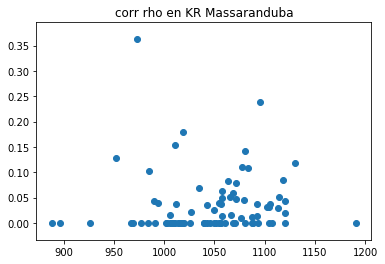

In [8]:
### Correlation between density and KR
for i in species:
    r,p = ss.kendalltau(data.rho12[data.Species==i],data.KR[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.kendalltau(data.rho12,data.KR)
print ("r=",format(r,'.2f'),"and p=",format(p,'.2f'))

slope, intercept, r_value, p_value, std_err = ss.linregress(data.rho12,data.KR)
print (slope,intercept,r_value, p_value, std_err)

# Plot of correlation between density and KR for Massaranduba, since it is apparently stat. sign. correlated. 
plt.scatter(data.rho12[(data.Species=='Massaranduba')],data.KR[(data.Species=='Massaranduba')])
plt.title("corr rho en KR Massaranduba")
# Does not look correlated: probably related to number of data with KR = 0

Massaranduba r= 0.10 and p= 0.17
Okan r= 0.11 and p= 0.29
Billinga r= -0.08 and p= 0.60
Eveuss r= -0.26 and p= 0.01
Tali r= -0.12 and p= 0.44
Greenheart r= 0.12 and p= 0.20
Total r= -0.36 and p= 0.00
-0.0005397212921299879 0.6611943743324736 -0.3636476084564997 1.9700770928439345e-10 8.17533799760883e-05


Text(0.5,1,'corr rho en grain angle total')

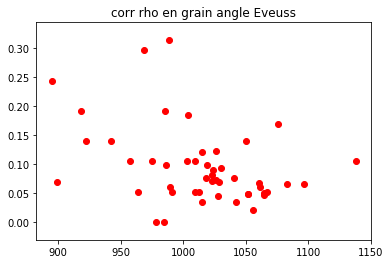

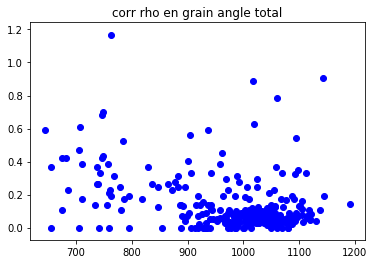

In [9]:
### Correlation between density and grain angle deviation
x,y = data.rho12,data.alpha

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.pearsonr(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
# plt.scatter(x,y)
# plt.title("r="+format(r,'.2f')+"  p="+format(p,'.2f'))
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

# A stat. sign. corr. coef. is observed for the total dataset and for the Eveuss data. Figures below do not give a strong
# impression that the variables are in fact so closely correlated. It is decided to move on with the data at hand.

plt.figure()
d,c = data.rho12[(data.Species=='Eveuss')],data.alpha[(data.Species=='Eveuss')]
plt.scatter(d,c,color='r')
plt.title("corr rho en grain angle Eveuss")
plt.figure()
plt.scatter(data.rho12,data.alpha,color='b')
plt.title("corr rho en grain angle total")

Text(0.15,1160,'$Eveuss$')

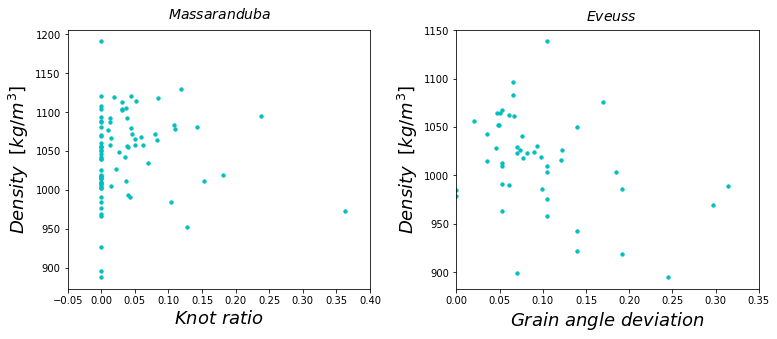

In [10]:
## Better looking graph for report
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$Knot$ $ratio$')
ax1.set_ylabel(r'$Density$  $[kg/m^3]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
ax1.set_xlim(-0.05,0.4)
# ax1.set_ylim(0,200)
s1 = ax1.scatter(data.KR[data.Species=='Massaranduba'],data.rho12[data.Species=='Massaranduba'],color='c',edgecolor='face',s=11)
ax1.text(0.1,1220,r'$Massaranduba$',fontsize=14)

ax2 = fig.add_axes([0.5,0.05,0.35,0.9])
ax2.set_xlabel(r'$Grain$ $angle$ $deviation$')
ax2.xaxis.label.set_fontsize(18)
ax2.set_ylabel(r'$Density$  $[kg/m^3]$')
ax2.yaxis.label.set_fontsize(18)
ax2.set_xlim(0,0.35)
# ax2.set_ylim(-80,80)
s3 = ax2.scatter(data.alpha[data.Species=='Eveuss'],data.rho12[data.Species=='Eveuss'],color='c',edgecolor='face',s=11)
ax2.text(0.15,1160,r'$Eveuss$',fontsize=14)
# plt.savefig('Correrlatiesgek'+'.eps', bbox_inches='tight')

In [11]:
### Correlation between knot ratio and grain angle deviation
x,y = data.KR,data.alpha

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.kendalltau(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

Massaranduba r= 0.14 and p= 0.09
Okan r= -0.02 and p= 0.84
Billinga r= -0.09 and p= 0.54
Eveuss r= 0.18 and p= 0.10
Tali r= 0.06 and p= 0.73
Greenheart r= -0.03 and p= 0.73
Total r= 0.03 and p= 0.52
0.005963662687723988 0.13428567207969347 0.004388100172679057 0.9408949893611567 0.0803617415914418


Massaranduba r= 0.13 and p= 0.11
Okan r= -0.07 and p= 0.53
Billinga r= 0.02 and p= 0.91
Eveuss r= -0.24 and p= 0.03
Tali r= 0.06 and p= 0.71
Greenheart r= -0.43 and p= 0.00
Total r= -0.12 and p= 0.05
-7362.860474400969 23961.236334537993 -0.16632972673042926 0.0046522715459707265 2581.0802666120553


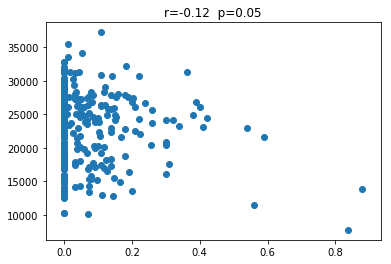

In [12]:
### Correlation between knot ratio and modulus of elasticity
x,y = data.KR,data.Edyn12

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.spearmanr(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
plt.scatter(x,y)
plt.title("r="+format(r,'.2f')+"  p="+format(p,'.2f'))
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

Massaranduba r= -0.03 and p= 0.69
Okan r= -0.25 and p= 0.02
Billinga r= -0.27 and p= 0.06
Eveuss r= -0.29 and p= 0.00
Tali r= -0.06 and p= 0.67
Greenheart r= -0.06 and p= 0.55
Total r= -0.49 and p= 0.00
-19044.15465808404 26007.9678378466 -0.5846844464488494 8.384961540009645e-28 1562.4914072450922


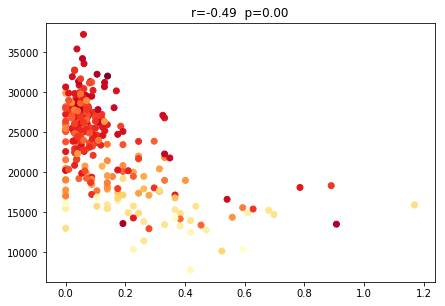

In [13]:
### Correlation between grain angle and modulus of elasticity
# Correlation is expected to use measured modulus of elasticity as proxy for grain angle
y,x = data.Edyn12,data.alpha

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.spearmanr(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
ax.scatter(x,y,c=data.rho12,edgecolors='face', cmap=plt.cm.get_cmap('YlOrRd'))
ax.set_title("r="+format(r,'.2f')+"  p="+format(p,'.2f'))
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

In [14]:
### Correlation between density and modulus of elasticity
# Correlation expected, as theoretically density influences modulus of elast. 
x,y = data.rho12,data.Edyn12

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.spearmanr(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
# plt.scatter(x,y)
# plt.title("r="+format(r,'.2f')+"  p="+format(p,'.2f'))
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

Massaranduba r= 0.39 and p= 0.00
Okan r= 0.27 and p= 0.01
Billinga r= 0.31 and p= 0.03
Eveuss r= 0.65 and p= 0.00
Tali r= -0.09 and p= 0.55
Greenheart r= 0.05 and p= 0.58
Total r= 0.61 and p= 0.00
34.26118723413517 -9978.575045363352 0.7087179523822342 3.091353874191457e-45 2.0166847228753557


In [15]:
### Correlation between density and strength
# independent and dependent variable -> corr. expected stat. sign. 
x,y = data.rho12,data.fm12

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.kendalltau(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
# plt.scatter(x,y)
# plt.title("r="+format(r,'.2f')+"  p="+format(p,'.2f'))
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

Massaranduba r= 0.29 and p= 0.00
Okan r= -0.00 and p= 0.96
Billinga r= 0.15 and p= 0.28
Eveuss r= 0.34 and p= 0.00
Tali r= -0.04 and p= 0.80
Greenheart r= -0.12 and p= 0.16
Total r= 0.36 and p= 0.00
0.1751843636252852 -75.68132857127316 0.5513489190819305 2.6483001411733544e-24 0.015674543403040683


Massaranduba r= 0.05 and p= 0.53
Okan r= -0.24 and p= 0.02
Billinga r= -0.11 and p= 0.43
Eveuss r= -0.24 and p= 0.02
Tali r= 0.03 and p= 0.82
Greenheart r= -0.22 and p= 0.02
Total r= -0.40 and p= 0.00
-2.1526170324687017 111.01788201239869 -0.5040011910295642 5.845807316496724e-20 0.218130602973527


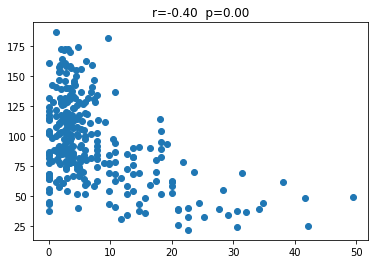

In [16]:
### Correlation between grain angle (in degrees) and strength
x,y = np.arctan(data.alpha)*360/(2*np.pi),data.fm12

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.spearmanr(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
plt.scatter(x,y)
plt.title("r="+format(r,'.2f')+"  p="+format(p,'.2f'))
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

Massaranduba r= 0.07 and p= 0.40
Okan r= -0.25 and p= 0.02
Billinga r= -0.22 and p= 0.15
Eveuss r= -0.17 and p= 0.10
Tali r= 0.03 and p= 0.83
Greenheart r= -0.36 and p= 0.00
Total r= -0.18 and p= 0.00
-76.1377200401543 100.57093058784216 -0.26168771368410104 6.784444851410151e-06 16.604641481139637


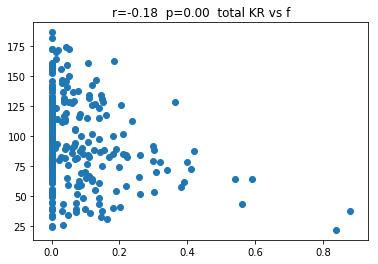

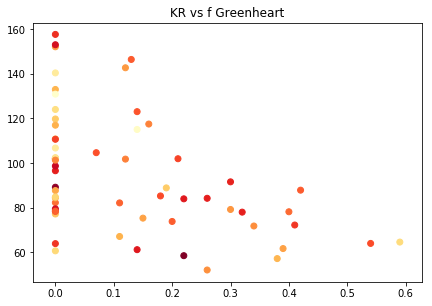

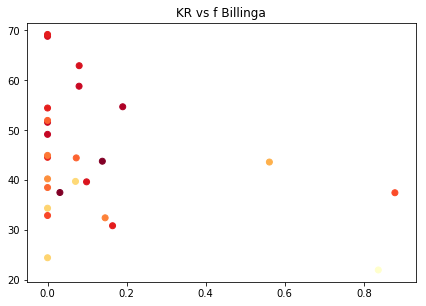

In [17]:
# Correlation between knot ratio and strength
x,y = data.KR,data.fm12

for i in species:
    r,p = ss.kendalltau(x[data.Species==i],y[data.Species==i])
    print (i, "r=",format(r,'.2f'),"and p=",format(p,'.2f'))

r,p = ss.spearmanr(x,y)
print ("Total r=",format(r,'.2f'),"and p=",format(p,'.2f'))
plt.scatter(x,y)
plt.title("r="+format(r,'.2f')+"  p="+format(p,'.2f') + "  total KR vs f")
slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
ax.set_title("KR vs f Greenheart")
s = ax.scatter(data.KR[data.Species=='Greenheart'],data.fm12[data.Species=='Greenheart'],c=data.rho12[data.Species=='Greenheart'],edgecolor='face',cmap='YlOrRd')
plt.show()
fig = plt.figure()
ax1 = fig.add_axes([0.05,0.05,0.9,0.9])
ax1.set_title("KR vs f Billinga")
s1 = ax1.scatter(data.KR[data.Species=='Billinga'],data.fm12[data.Species=='Billinga'],c=data.Edyn12[data.Species=='Billinga'],cmap='YlOrRd')
plt.show()

### 3. Determination of distribution functions per variable for later use in Monte Carlo simulation

In [18]:
# Definition of Weibull distribution function and fit function
def weib(x,a,b):
    return (b / a) * (x / a)**(b - 1) * np.exp(-(x / a)**b)

def weibcdf(x,a,b):
    return 1-np.exp(-(x / a)**b)

def weibullfit(x):
    reeks = sorted(x)
    reeks = [x for x in reeks if x != 0.0]
    bins = np.arange(1,2*len(reeks),2) / (2.*len(reeks))
    logreeks = np.log(reeks)
    logbins = np.log(-np.log(1-bins))
    beta,intercept = ss.linregress(logreeks,logbins)[0:2]
    alpha = np.exp(-intercept/beta)
    #print "alpha =", alpha, "   beta =",beta
    return alpha,beta

#### Determination of distr. func. of the grain angle per species

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


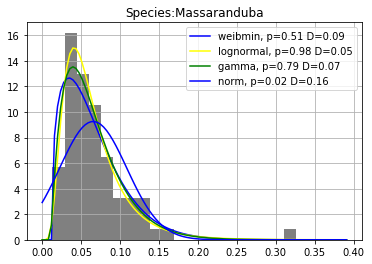

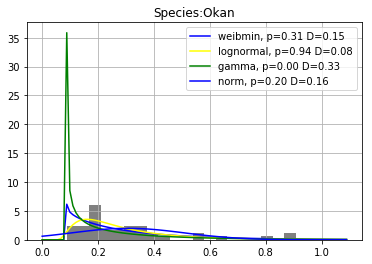

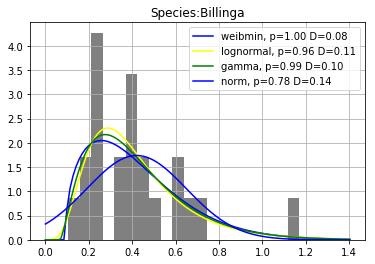

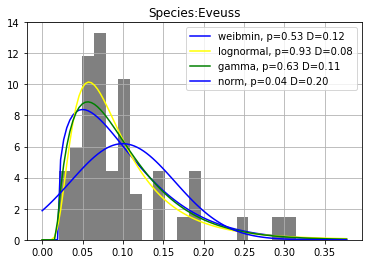

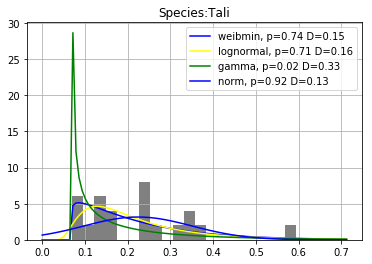

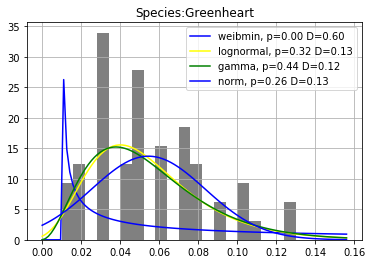

In [19]:
paramalpha = []
for i in species:
    X = data.alpha[(data.alpha!=0.) & (data.Species==i)]
    alpha,beta = weibullfit(X)
    param_weib1 = (beta,0,alpha)
    param_weib_min = ss.weibull_min.fit(X,loc=0)
    param_lognorm = ss.lognorm.fit(X,1,loc=0)
    param_gamma = ss.gamma.fit(X,0.2,loc=0)
    param_norm = ss.norm.fit(X,loc=0,scale=1)
    Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
    Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
    Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
    Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
    Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
    x = np.linspace(0,X.max()*1.2,100)
    weib1_pdf = weib(x,alpha,beta)
    weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
    lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
    gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
    norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
    plt.figure()
    #plt.plot(x,weib1_pdf,'r',label="weib1, p="+format(pweib1,'.2f')+" D="+format(Dweib1,'.2f'))
    plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+format(pweibmin,'.2f')+" D="+format(Dweibmin,'.2f'))
    plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+format(plognorm,'.2f')+" D="+format(Dlognorm,'.2f'))
    plt.plot(x,gamma_pdf,'g',label="gamma, p="+format(pgamma,'.2f')+" D="+format(Dgamma,'.2f'))
    plt.plot(x,norm_pdf,'b',label="norm, p="+format(pnorm,'.2f')+" D="+format(Dnorm,'.2f'))
    X.hist(normed=True,bins=20,color='Grey')
    plt.legend(loc=0)
    plt.title("Species:"+i)
    paramalpha.append(param_lognorm)

In [20]:
X = data.alpha[(data.alpha!=0.) & (data.Species=='Billinga')]
param_weib_min = ss.weibull_min.fit(X,loc=0)
print ("Billinga: ", param_weib_min)

X = data.alpha[(data.alpha!=0.) & (data.Species=='Tali')]
param_norm = ss.norm.fit(X,loc=0,scale=1)
print ("Tali: ", param_norm)

X = data.alpha[(data.alpha!=0.) & (data.Species=='Greenheart')]
param_gamma = ss.gamma.fit(X,0.2,loc=0)
print ('Greenheart: ', param_gamma)

Billinga:  (1.4653700952716093, 0.09241717062178009, 0.3620005225043336)
Tali:  (0.2241370197368421, 0.12652615908558018)
Greenheart:  (3.3017491879364202, -0.0005751677299719682, 0.01666374974593722)


In [21]:
for i in range(len(species)):
    print (species[i],format(paramalpha[i][1],'.2f'), format(paramalpha[i][0],'.2f'),format(paramalpha[i][2],'.2f'))

Massaranduba 0.00 0.56 0.06
Okan 0.05 0.75 0.20
Billinga -0.03 0.48 0.40
Eveuss 0.01 0.63 0.08
Tali 0.03 0.67 0.16
Greenheart -0.03 0.36 0.08


#### Determination of distr. func. of the grain angle of total dataset

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


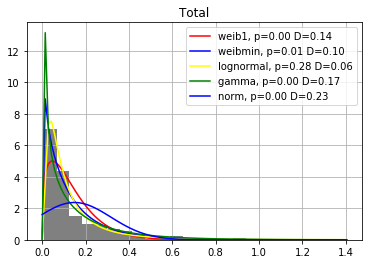

In [22]:
paramalphatot = []
X = data.alpha[data.alpha!=0.]
alpha,beta = weibullfit(X)
param_weib1 = (beta,0,alpha)
param_weib_min = ss.weibull_min.fit(X,loc=0)
param_lognorm = ss.lognorm.fit(X,1,loc=0)
param_gamma = ss.gamma.fit(X,0.2,loc=0)
param_norm = ss.norm.fit(X,loc=0,scale=1)
Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
x = np.linspace(0,X.max()*1.2,100)
weib1_pdf = weib(x,alpha,beta)
weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
plt.figure()
plt.plot(x,weib1_pdf,'r',label="weib1, p="+format(pweib1,'.2f')+" D="+format(Dweib1,'.2f'))
plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+format(pweibmin,'.2f')+" D="+format(Dweibmin,'.2f'))
plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+format(plognorm,'.2f')+" D="+format(Dlognorm,'.2f'))
plt.plot(x,gamma_pdf,'g',label="gamma, p="+format(pgamma,'.2f')+" D="+format(Dgamma,'.2f'))
plt.plot(x,norm_pdf,'b',label="norm, p="+format(pnorm,'.2f')+" D="+format(Dnorm,'.2f'))
X.hist(normed=True,bins=20,color='Grey')
plt.legend(loc=0)
plt.title("Total")
paramalphatot.append(param_lognorm)

In [23]:
print (format(paramalphatot[0][0],'.2f'),format(paramalphatot[0][1],'.2f'),format(paramalphatot[0][2],'.2f'))

1.01 0.01 0.09


#### Determination of distr. func. of the knot ratio per species

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


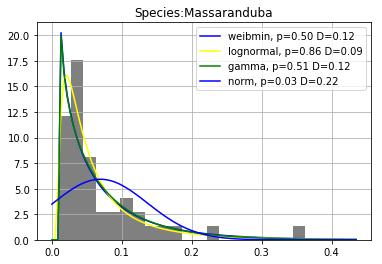

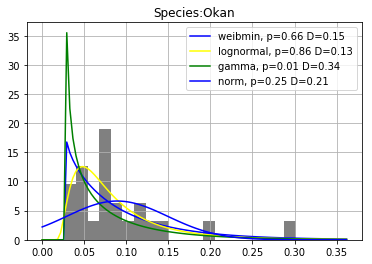

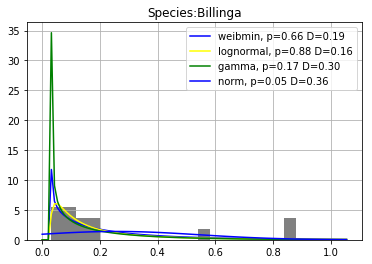

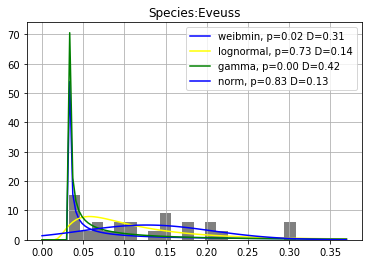

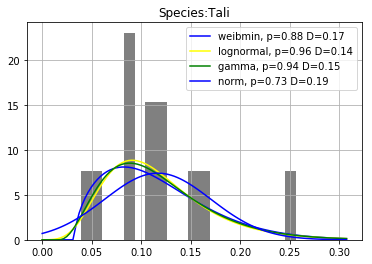

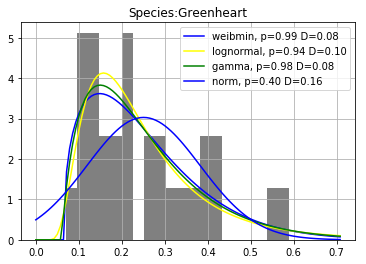

In [24]:
paramKR = []
for i in species:
    X = data.KR[(data.KR!=0.) & (data.Species==i)]
    alpha,beta = weibullfit(X)
    param_weib1 = (beta,0,alpha)
    param_weib_min = ss.weibull_min.fit(X,loc=0)
    param_lognorm = ss.lognorm.fit(X,1,loc=0)
    param_gamma = ss.gamma.fit(X,0.2,loc=0)
    param_norm = ss.norm.fit(X,loc=0,scale=1)
    Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
    Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
    Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
    Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
    Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
    x = np.linspace(0,X.max()*1.2,100)
    weib1_pdf = weib(x,alpha,beta)
    weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
    lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
    gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
    norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
    plt.figure()
    #plt.plot(x,weib1_pdf,'r',label="weib1, p="+format(pweib1,'.2f')+" D="+format(Dweib1,'.2f'))
    plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+format(pweibmin,'.2f')+" D="+format(Dweibmin,'.2f'))
    plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+format(plognorm,'.2f')+" D="+format(Dlognorm,'.2f'))
    plt.plot(x,gamma_pdf,'g',label="gamma, p="+format(pgamma,'.2f')+" D="+format(Dgamma,'.2f'))
    plt.plot(x,norm_pdf,'b',label="norm, p="+format(pnorm,'.2f')+" D="+format(Dnorm,'.2f'))
    X.hist(normed=True,bins=20,color='Grey')
    plt.legend(loc=0)
    plt.title("Species:"+i)
    paramKR.append(param_lognorm)

In [26]:
X = data.KR[(data.KR!=0.) & (data.Species=='Eveuss')]
param_norm = ss.norm.fit(X,loc=0,scale=1)
Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
print (param_norm)

(0.12720645270833333, 0.07928559049310652)


In [27]:
X = data.KR[(data.KR!=0.) & (data.Species=='Greenheart')]
param_weib_min = ss.weibull_min.fit(X,loc=0)
print (param_weib_min)

(1.401046908785346, 0.0653542205357194, 0.20313697364772787)


In [28]:
for i in range(len(species)):
    print (species[i],format(paramKR[i][1],'.2f'), format(paramKR[i][0],'.2f'),format(paramKR[i][2],'.2f'))

Massaranduba 0.01 0.98 0.04
Okan 0.02 0.74 0.06
Billinga 0.02 1.25 0.11
Eveuss 0.01 0.81 0.09
Tali -0.02 0.37 0.13
Greenheart 0.02 0.59 0.19


#### Determination of distr. func. of the knot ratio for total dataset

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


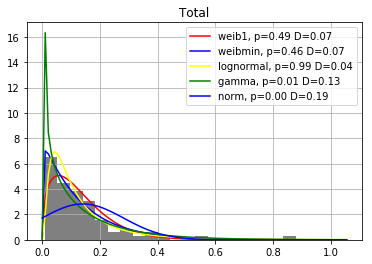

In [29]:
paramKRtot = []
X = data.KR[data.KR!=0.]
alpha,beta = weibullfit(X)
param_weib1 = (beta,0,alpha)
param_weib_min = ss.weibull_min.fit(X,loc=0)
param_lognorm = ss.lognorm.fit(X,1,loc=0)
param_gamma = ss.gamma.fit(X,0.2,loc=0)
param_norm = ss.norm.fit(X,loc=0,scale=1)
Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
x = np.linspace(0,X.max()*1.2,100)
weib1_pdf = weib(x,alpha,beta)
weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
plt.figure()
plt.plot(x,weib1_pdf,'r',label="weib1, p="+format(pweib1,'.2f')+" D="+format(Dweib1,'.2f'))
plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+format(pweibmin,'.2f')+" D="+format(Dweibmin,'.2f'))
plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+format(plognorm,'.2f')+" D="+format(Dlognorm,'.2f'))
plt.plot(x,gamma_pdf,'g',label="gamma, p="+format(pgamma,'.2f')+" D="+format(Dgamma,'.2f'))
plt.plot(x,norm_pdf,'b',label="norm, p="+format(pnorm,'.2f')+" D="+format(Dnorm,'.2f'))
X.hist(normed=True,bins=20,color='Grey')
plt.legend(loc=0)
plt.title("Total")
paramKRtot.append(param_lognorm)

In [30]:
print (format(paramKRtot[0][0],'.2f'),format(paramKRtot[0][1],'.2f'),format(paramKRtot[0][2],'.2f'))

0.89 -0.00 0.10


#### Determination of distr. func. of the density per species

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


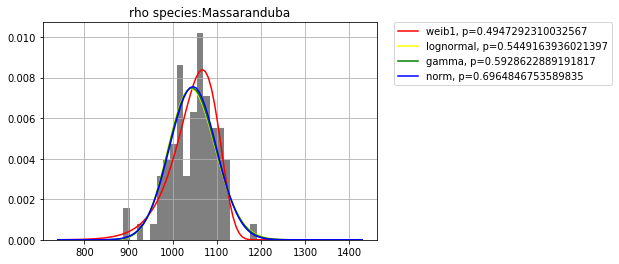

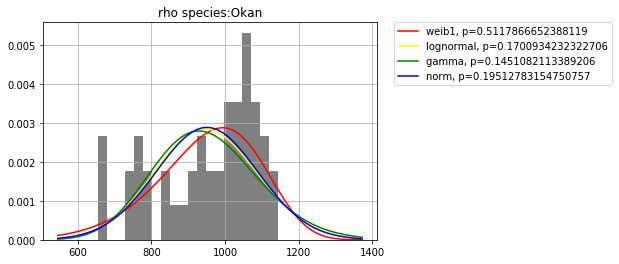

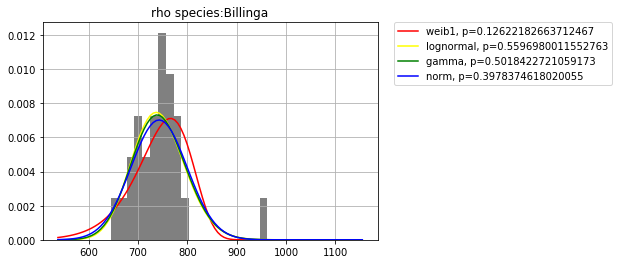

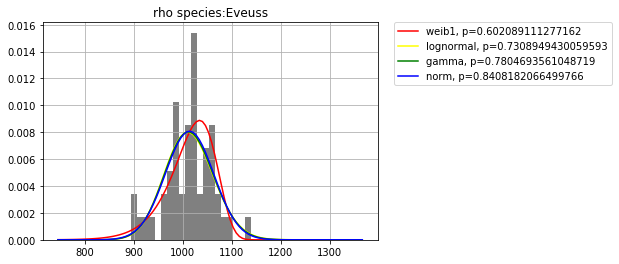

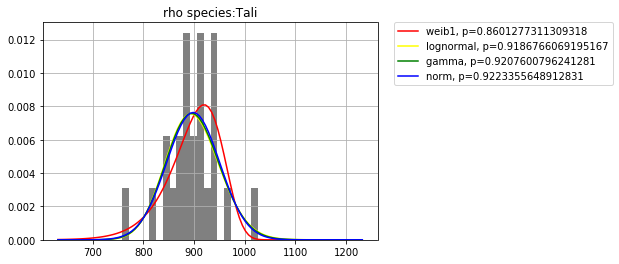

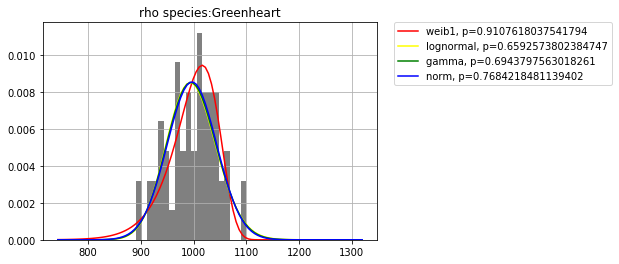

In [31]:
for i in species:
    X = data.rho12[data.Species==i]
    alpha,beta = weibullfit(X)
    param_weib1 = (beta,0,alpha)
    param_weib_min = ss.weibull_min.fit(X,loc=0)
    param_lognorm = ss.lognorm.fit(X,1,loc=0)
    param_gamma = ss.gamma.fit(X,0.2,loc=0)
    param_norm = ss.norm.fit(X,loc=0,scale=1)
    Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
    Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
    Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
    Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
    Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
    x = np.linspace(X.min()/1.2,X.max()*1.2,100)
    weib1_pdf = weib(x,alpha,beta)
    weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
    lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
    gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
    norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
    plt.figure()
    plt.plot(x,weib1_pdf,'r',label="weib1, p="+str(pweib1))
    #plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+str(pweibmin))
    plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+str(plognorm))
    plt.plot(x,gamma_pdf,'g',label="gamma, p="+str(pgamma))
    plt.plot(x,norm_pdf,'b',label="norm, p="+str(pnorm))
    X.hist(normed=True,bins=20,color='Grey')
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("rho species:"+i)

#### Determination of distr. func. of the density for total dataset

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total')

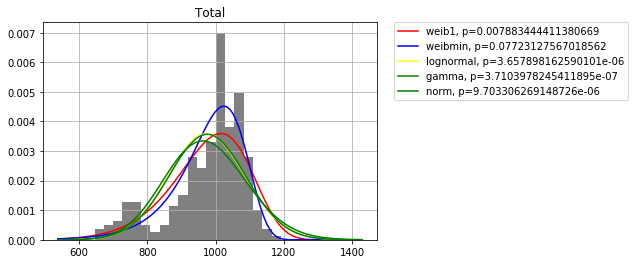

In [32]:
X = data.rho12
alpha,beta = weibullfit(X)
param_weib1 = (beta,0,alpha)
param_weib_min = ss.weibull_min.fit(X,loc=0)
param_lognorm = ss.lognorm.fit(X,1,loc=0)
param_gamma = ss.gamma.fit(X,0.2,loc=0)
param_norm = ss.norm.fit(X,loc=0,scale=1)
Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
x = np.linspace(X.min()/1.2,X.max()*1.2,100)
weib1_pdf = weib(x,alpha,beta)
weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
plt.figure()
plt.plot(x,weib1_pdf,'r',label="weib1, p="+str(pweib1))
plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+str(pweibmin))
plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+str(plognorm))
plt.plot(x,gamma_pdf,'g',label="gamma, p="+str(pgamma))
plt.plot(x,norm_pdf,'g',label="norm, p="+str(pnorm))
X.hist(normed=True,bins=20,color='Grey')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Total")

#### Determination of distr. func. of the mod. of elast. per species

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


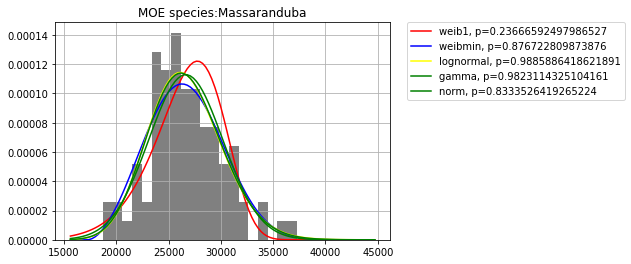

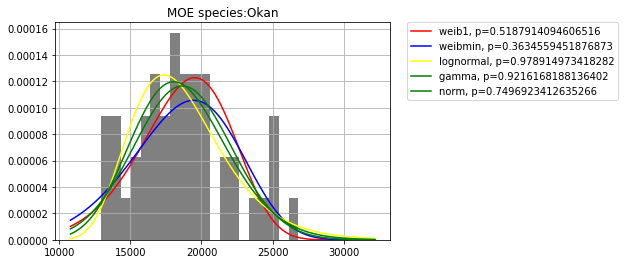

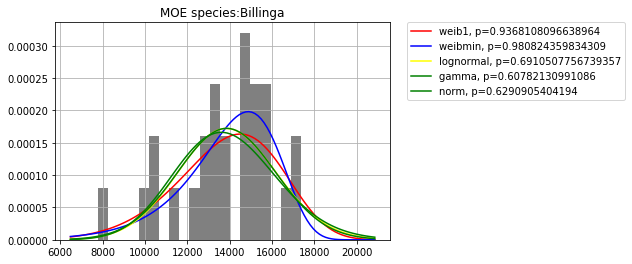

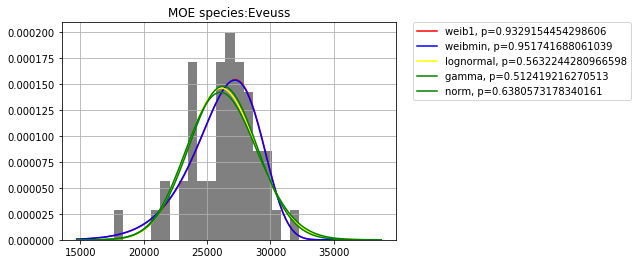

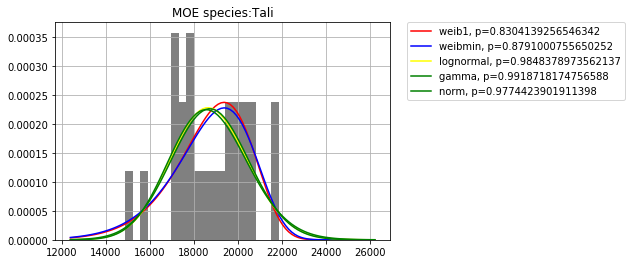

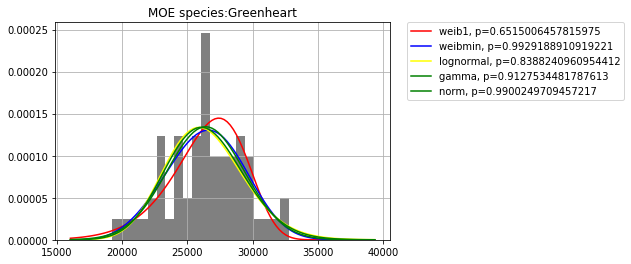

In [33]:
for i in species:
    X = data.Edyn12[data.Species==i]
    alpha,beta = weibullfit(X)
    param_weib1 = (beta,0,alpha)
    param_weib_min = ss.weibull_min.fit(X,loc=0)
    param_lognorm = ss.lognorm.fit(X,1,loc=0)
    param_gamma = ss.gamma.fit(X,0.2,loc=0)
    param_norm = ss.norm.fit(X,loc=0,scale=1)
    Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
    Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
    Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
    Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
    Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
    x = np.linspace(X.min()/1.2,X.max()*1.2,100)
    weib1_pdf = weib(x,alpha,beta)
    weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
    lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
    gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
    norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
    plt.figure()
    plt.plot(x,weib1_pdf,'r',label="weib1, p="+str(pweib1))
    plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+str(pweibmin))
    plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+str(plognorm))
    plt.plot(x,gamma_pdf,'g',label="gamma, p="+str(pgamma))
    plt.plot(x,norm_pdf,'g',label="norm, p="+str(pnorm))
    X.hist(normed=True,bins=20,color='Grey')
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("MOE species:"+i)

#### Determination of distr. func. of the mod. of elast. for total dataset

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'MOE total')

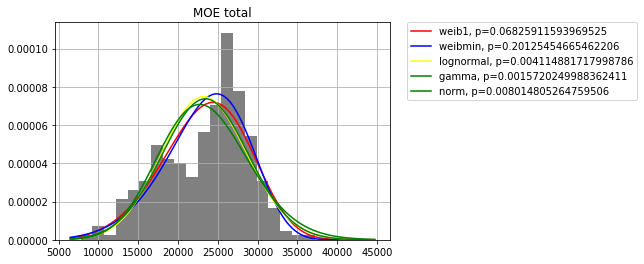

In [34]:
X = data.Edyn12
alpha,beta = weibullfit(X)
param_weib1 = (beta,0,alpha)
param_weib_min = ss.weibull_min.fit(X,loc=0)
param_lognorm = ss.lognorm.fit(X,1,loc=0)
param_gamma = ss.gamma.fit(X,0.2,loc=0)
param_norm = ss.norm.fit(X,loc=0,scale=1)
Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
x = np.linspace(X.min()/1.2,X.max()*1.2,100)
weib1_pdf = weib(x,alpha,beta)
weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
plt.figure()
plt.plot(x,weib1_pdf,'r',label="weib1, p="+str(pweib1))
plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+str(pweibmin))
plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+str(plognorm))
plt.plot(x,gamma_pdf,'g',label="gamma, p="+str(pgamma))
plt.plot(x,norm_pdf,'g',label="norm, p="+str(pnorm))
X.hist(normed=True,bins=20,color='Grey')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("MOE total")

#### Determination of distr. func. of the strength per species

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


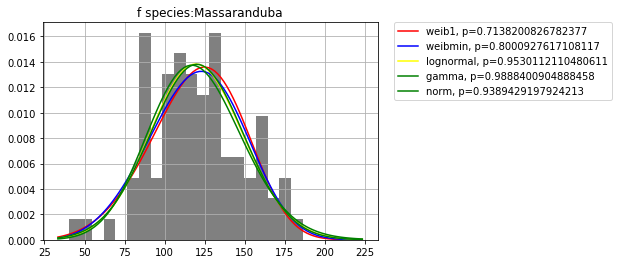

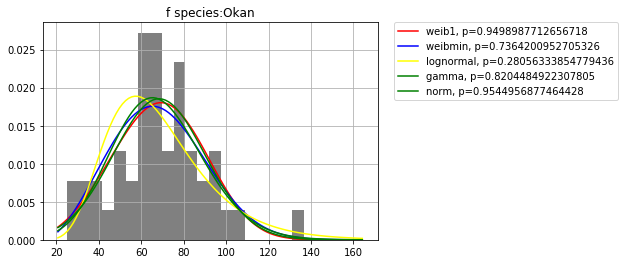

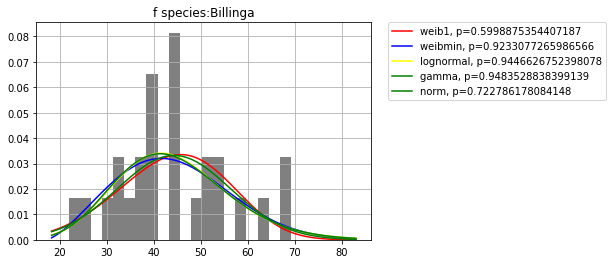

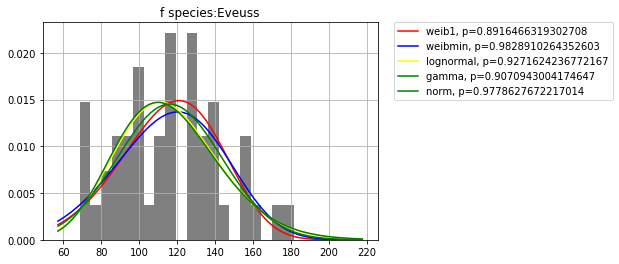

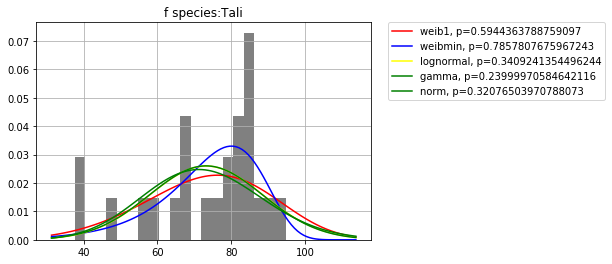

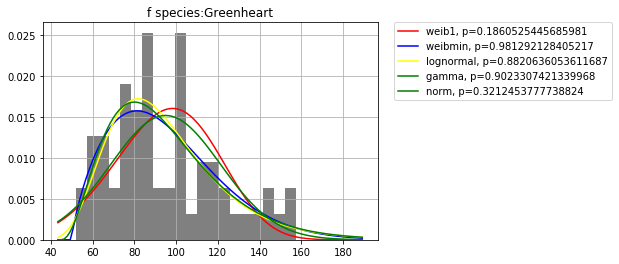

In [35]:
for i in species:
    X = data.fm12[data.Species==i]
    alpha,beta = weibullfit(X)
    param_weib1 = (beta,0,alpha)
    param_weib_min = ss.weibull_min.fit(X,loc=0)
    param_lognorm = ss.lognorm.fit(X,1,loc=0)
    param_gamma = ss.gamma.fit(X,0.2,loc=0)
    param_norm = ss.norm.fit(X,loc=0,scale=1)
    Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
    Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
    Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
    Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
    Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
    x = np.linspace(X.min()/1.2,X.max()*1.2,100)
    weib1_pdf = weib(x,alpha,beta)
    weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
    lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
    gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
    norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
    plt.figure()
    plt.plot(x,weib1_pdf,'r',label="weib1, p="+str(pweib1))
    plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+str(pweibmin))
    plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+str(plognorm))
    plt.plot(x,gamma_pdf,'g',label="gamma, p="+str(pgamma))
    plt.plot(x,norm_pdf,'g',label="norm, p="+str(pnorm))
    X.hist(normed=True,bins=20,color='Grey')
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("f species:"+i)

#### Determination of distr. func. of the strength of total dataset

D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'f total')

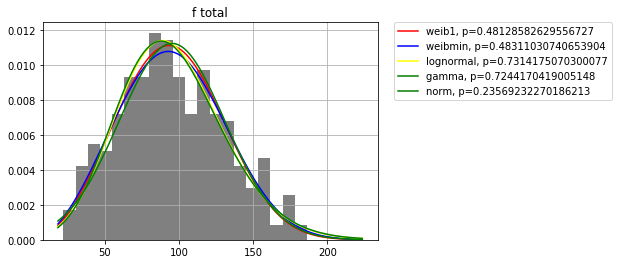

In [36]:
X = data.fm12
alpha,beta = weibullfit(X)
param_weib1 = (beta,0,alpha)
param_weib_min = ss.weibull_min.fit(X,loc=0)
param_lognorm = ss.lognorm.fit(X,1,loc=0)
param_gamma = ss.gamma.fit(X,0.2,loc=0)
param_norm = ss.norm.fit(X,loc=0,scale=1)
Dweib1,pweib1 = ss.kstest(X,'weibull_min',param_weib1)
Dweibmin,pweibmin = ss.kstest(X,'weibull_min',param_weib_min)
Dlognorm,plognorm = ss.kstest(X,'lognorm',param_lognorm)
Dgamma,pgamma = ss.kstest(X,'gamma',param_gamma)
Dnorm,pnorm = ss.kstest(X,'norm',param_norm)
x = np.linspace(X.min()/1.2,X.max()*1.2,100)
weib1_pdf = weib(x,alpha,beta)
weib_min_pdf = ss.weibull_min.pdf(x,param_weib_min[0],param_weib_min[1],param_weib_min[2])
lognorm_pdf = ss.lognorm.pdf(x,param_lognorm[0],param_lognorm[1],param_lognorm[2])
gamma_pdf = ss.gamma.pdf(x,param_gamma[0],param_gamma[1],param_gamma[2])
norm_pdf = ss.norm.pdf(x,param_norm[0],param_norm[1])
plt.figure()
plt.plot(x,weib1_pdf,'r',label="weib1, p="+str(pweib1))
plt.plot(x,weib_min_pdf,'b',label="weibmin, p="+str(pweibmin))
plt.plot(x,lognorm_pdf,'yellow',label="lognormal, p="+str(plognorm))
plt.plot(x,gamma_pdf,'g',label="gamma, p="+str(pgamma))
plt.plot(x,norm_pdf,'g',label="norm, p="+str(pnorm))
X.hist(normed=True,bins=20,color='Grey')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("f total")

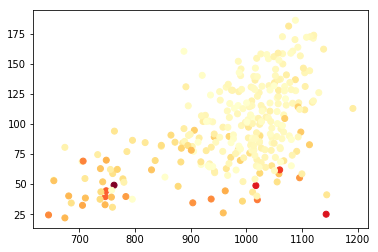

In [37]:
x = data.rho12
y = data.fm12
plt.scatter(x,y,c=data.alpha,edgecolors='face',cmap=plt.cm.get_cmap('YlOrRd'))

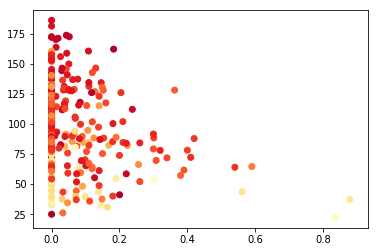

In [38]:
x = data.KR
y = data.fm12
plt.scatter(x,y,c = data.rho12, edgecolors='face', cmap=plt.cm.get_cmap('YlOrRd'))

0.005251678116242806 -27.90510768070446 0.7990211249315833 3.896401197427347e-65 0.00023369539709981054


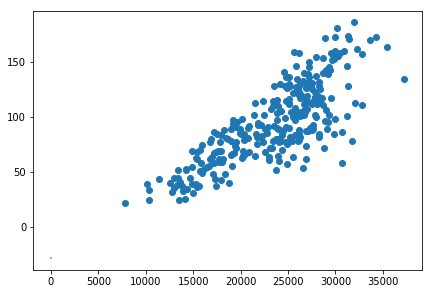

In [39]:
## Prediction of strength based on stiffness
x = data.Edyn12
y = data.fm12

slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print (slope,intercept,r_value, p_value, std_err)

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)
s = ax.scatter(x,y)
reeks = np.linspace(-1,1,100)
s2 = plt.plot(reeks,slope*reeks+intercept)
plt.show()